In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r'/Users/vineetasinha/Documents/Backups/Apr30/dataanalytics/tasks/Data-Immersion/Achievement 6/World Happiness Project'

In [5]:
df = pd.read_csv(os.path.join(path,'Data','Cleaned Data','FinalWHData.csv'))

In [7]:
df.head(5)

,Unnamed: 0,Country,Overall Rank,Happiness Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom to make life choices,Absence of Corruption,Generosity
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df = df.drop(columns=['Unnamed: 0'])


In [11]:
df.head(5)

,Country,Overall Rank,Happiness Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom to make life choices,Absence of Corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_24890/2988830285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life Expectancy'], bins=25)


<Axes: xlabel='Life Expectancy', ylabel='Density'>

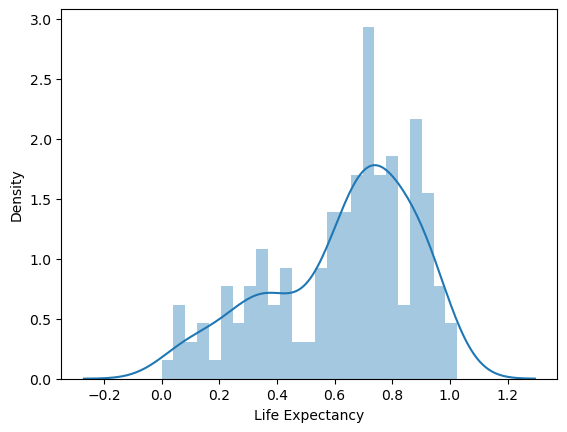

In [15]:
sns.distplot(df['Life Expectancy'], bins=25)


In [17]:
df['Life Expectancy'].mean()


0.6302593670886076

In [19]:
df['Life Expectancy'].median()


0.6967049999999999

In [21]:
df['Life Expectancy'].max()


1.02525

In [23]:
df['Life Expectancy'].min()


0.0

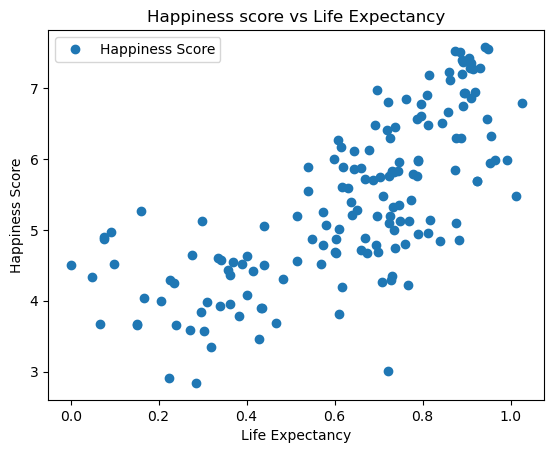

In [27]:
df.plot(x = 'Life Expectancy', y='Happiness Score',style='o') 
plt.title('Happiness score vs Life Expectancy')  
plt.xlabel('Life Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()

In [31]:
# Higher the Life Expectancy, higher would be the happiness score of a country.


In [29]:
# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [33]:
X = df['Life Expectancy'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [35]:
X

array([[0.94143],
       [0.94784],
       [0.87464],
       [0.88521],
       [0.90563],
       [0.88911],
       [0.89284],
       [0.91087],
       [0.90837],
       [0.93156],
       [0.91387],
       [0.86027],
       [0.89042],
       [0.81444],
       [0.86179],
       [0.69702],
       [0.91894],
       [0.89533],
       [0.89667],
       [0.80925],
       [0.90943],
       [0.76276],
       [0.72052],
       [1.02525],
       [0.79661],
       [0.89186],
       [0.85857],
       [0.79733],
       [0.94579],
       [0.78723],
       [0.84483],
       [0.8116 ],
       [0.69077],
       [0.7385 ],
       [0.72025],
       [0.95562],
       [0.88721],
       [0.8753 ],
       [0.72492],
       [0.6082 ],
       [0.61483],
       [0.67737],
       [0.64425],
       [0.59772],
       [0.78902],
       [0.99111],
       [0.96538],
       [0.79075],
       [0.74716],
       [0.95446],
       [0.5392 ],
       [0.61826],
       [0.66098],
       [0.64368],
       [0.87337],
       [0.

In [37]:
y

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [39]:
# Split the data into two sets: a training set and a test set.


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [45]:
regression=LinearRegression()

In [47]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)


LinearRegression()

In [49]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

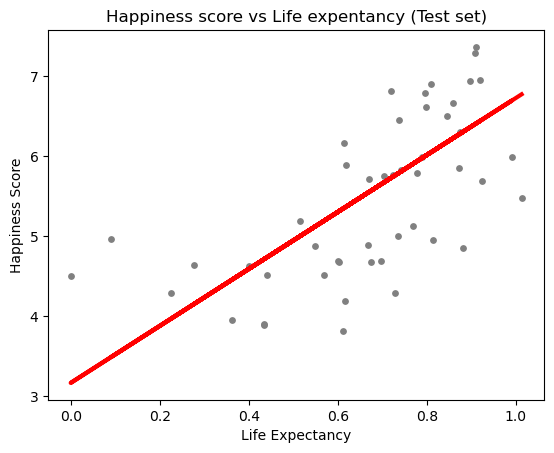

In [51]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness score vs Life expentancy (Test set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [53]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [55]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.55646913]]
Mean squared error:  0.6177524296278911
R2 score:  0.36947391733588475


In [57]:
# Interpretation
# the regression model indicates a positive relationship between the independent and dependent variables
# The positive slope indicates that as the independent variable increases, the dependent variable also tends to increase.
# The MSE provides a measure of the average squared prediction error.
# The R² score shows that about 37% of the variability in the dependent variable is explained by the model, suggesting a moderate fit.

In [59]:
y_predicted

array([[6.40806902],
       [5.97471326],
       [4.59587018],
       [5.19129424],
       [5.54879052],
       [3.16858799],
       [4.73539046],
       [4.46011975],
       [5.65118126],
       [5.78419321],
       [6.00170686],
       [4.71707465],
       [6.22206569],
       [5.74325825],
       [4.99896039],
       [5.54519848],
       [5.76217867],
       [5.12140962],
       [4.71109978],
       [5.81154246],
       [6.69344011],
       [5.79504044],
       [5.93918413],
       [6.39917785],
       [5.3552119 ],
       [6.28156542],
       [6.3058561 ],
       [6.04666063],
       [5.34208853],
       [5.30830208],
       [5.36741059],
       [6.27470143],
       [6.43676973],
       [3.97099856],
       [5.36335622],
       [5.73109513],
       [3.49332919],
       [6.45320062],
       [4.15330316],
       [6.06088651],
       [6.00426752],
       [5.3108983 ],
       [5.56529254],
       [5.9031571 ],
       [6.35756716],
       [5.67163096],
       [6.1731998 ],
       [6.772

In [61]:
# Create a dataframe comparing the actual and predicted values of y.
compare_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_data.head(30)

,Actual,Predicted
0,7.364,6.408069
1,5.995,5.974713
2,4.633,4.595870
3,4.514,5.191294
4,5.716,5.548791
5,4.507,3.168588
6,4.512,4.735390
7,3.956,4.460120
8,4.686,5.651181
9,5.007,5.784193


In [63]:
# Compare how the regression fits the training set


In [65]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [68]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)


In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.55646913]]
Mean squared error:  0.6254607615034393
R2 score:  0.5659174321740184


In [ ]:
# The positive slope suggests a direct relationship between the independent variable and the dependent variable. As the independent variable increases, the dependent variable tends to increase by approximately 3.556 units for each unit increase in the independent variable.
# The MSE value indicates the average squared difference between actual and predicted values. Although the MSE provides insight into the accuracy of the predictions, it is more informative when compared to MSEs from other models or when interpreted in the context of the dependent variable's scale.
# The R² score of approximately 0.566 indicates that the model explains about 56.59% of the variance in the dependent variable. This suggests that the independent variable has a significant influence on the dependent variable, but other factors also play a substantial role in determining the dependent variable's values.

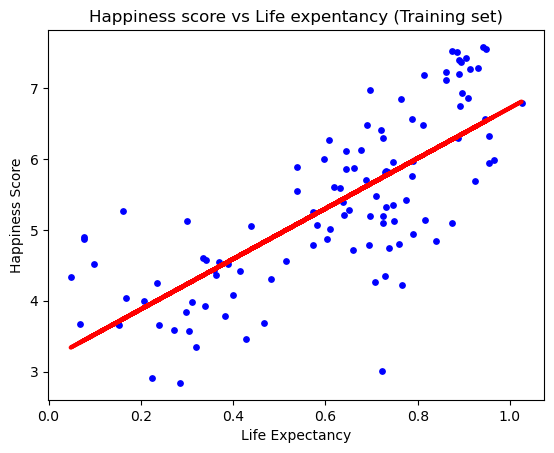

In [72]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness score vs Life expentancy (Training set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [74]:
# Performance improvement after removing outliers


In [76]:
# Clean the extreme values from the 'Life Expectancy' variable observed during the consistency checks.
df_test=df[df['Life Expectancy']<=1.102504] # Q2 (mean)+stdev*2 


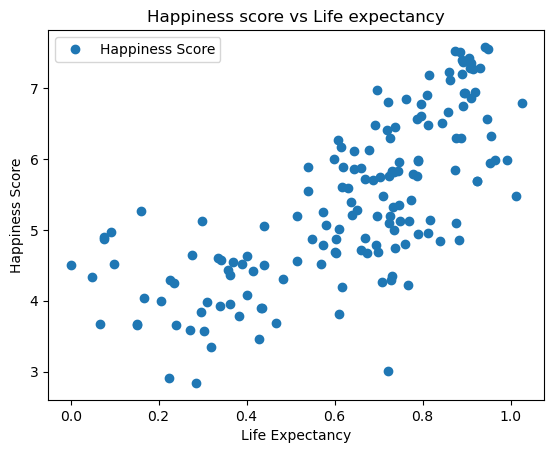

In [78]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'Life Expectancy', y='Happiness Score', style='o')  
plt.title('Happiness score vs Life expectancy')  
plt.xlabel('Life Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()


In [80]:
# Reshape again.
X_2 = df_test['Life Expectancy'].values.reshape(-1,1)
y_2 = df_test['Happiness Score'].values.reshape(-1,1)


In [82]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)


In [84]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [86]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [88]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)


In [90]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.55646913]]
Mean squared error:  0.6177524296278911
R2 score:  0.36947391733588475


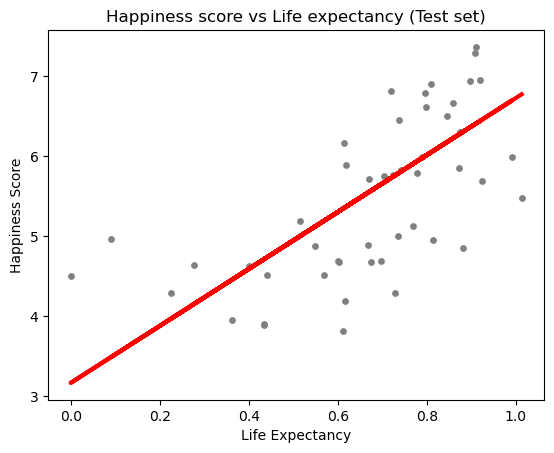

In [96]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Happiness score vs Life expectancy (Test set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [98]:
data_compare_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_compare_2.head(20)

,Actual,Predicted
0,7.364,6.408069
1,5.995,5.974713
2,4.633,4.595870
3,4.514,5.191294
4,5.716,5.548791
5,4.507,3.168588
6,4.512,4.735390
7,3.956,4.460120
8,4.686,5.651181
9,5.007,5.784193


In [100]:

# the regression model indicates a positive relationship between the independent and dependent variables
# The positive slope indicates that as the independent variable increases, the dependent variable also tends to increase.
# The MSE provides a measure of the average squared prediction error.
# The R² score shows that about 37% of the variability in the dependent variable is explained by the model, suggesting a moderate fit.